# FP1 - Optik Grundpraktikum

## 1. Polarization Optics

## 2. Electro-Optic effect

### 2.1 Characterization of the high voltage supply

In [2]:
%matplotlib inline
import numpy as np
import matplotlib.pyplot as plt
import scipy.optimize as opt
import uncertainties as unc
import uncertainties.unumpy as unp
import pandas as pd

Verstärkungsfaktor m = 291.8+/-2.5
max Voltage 0.00617+/-0.00005 V


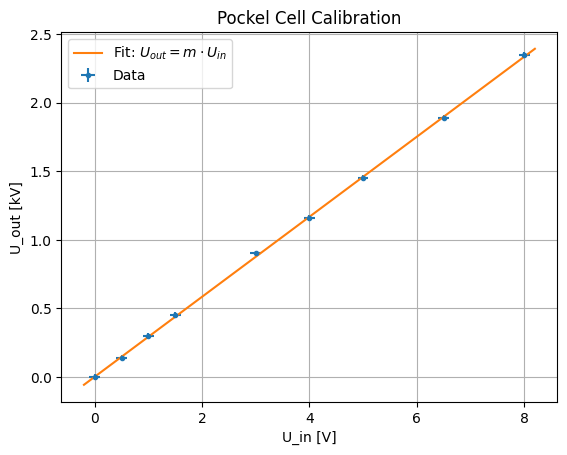

In [3]:
# Measurement data without pockel cell attached
U_in = np.array([0, 0.5, 1.0, 1.5, 3.0, 4.0 , 5.0, 6.5, 8.0]) # in V
dU_in = np.ones(len(U_in)) * 0.1
U_out = np.array([0, 0.14, 0.30, 0.45, 0.90, 1.16 , 1.45, 1.89 ,2.35]) # in kV
dU_out = np.ones(len(U_out)) * 0.02

def linear(x, m, b):
    return m*x + b

# Fit the data
popt, pcov = opt.curve_fit(linear, U_in, U_out, sigma=dU_out, absolute_sigma=True)

m = popt[0]
dm = np.sqrt(pcov[0,0])
m = unc.ufloat(m, dm)*1e3 # convert to V/V

# Plot the data 

plt.errorbar(U_in, U_out, xerr=dU_in, yerr=dU_out, fmt='o', label='Data', markersize=3)
x = np.linspace(-0.2, 8.2, 100)
plt.plot(x, linear(x, m.n*1e-3, 0), label=r'Fit: $U_{out} = m \cdot U_{in}$')
plt.xlabel('U_in [V]')
plt.ylabel('U_out [kV]')
plt.title('Pockel Cell Calibration')
plt.grid()
plt.legend()
plt.savefig('pockel_cell_calibration.pdf')

print("Verstärkungsfaktor m = {:.1f}".format(m))
print("max Voltage", 1.8/m, "V")

$\Rightarrow$ linear amplification with V = $291.8\pm2.5$ $\\$
$\Rightarrow$ Almost no scattering $\\$
$\Rightarrow$ Input voltage below 6V

### 2.2 Mach-Zehnder Interferometer
$$I_{\mathrm{out}}=\textstyle{\frac{1}{2}}I_{\mathrm{in}}+{\textstyle{\frac{1}{2}}}I_{\mathrm{in}}\cos\phi=\textstyle{\frac{1}{2}}I_{\mathrm{in}}\left({\bf1}+\cos\phi\right)$$
with $\phi=\phi_{1}-\phi_{2}$
$$T={\frac{I_{\mathrm{out}}}{I_{\mathrm{in}}}}={\frac{1}{2}}\left(1+\cos\phi\right)=\cos^{2}{\frac{\phi}{2}}$$
with $\phi(V)=\phi_{0}-\pi\frac{V}{U_{\pi}}$:
$$T(V)=\mathrm{cos}^{2}\left({\frac{\phi_{0}}{2}}-{\frac{\pi}{2}}{\frac{V}{U_{\pi}}}\right)$$

- Sawtooth-wave between 0-1.8kV with V_pp = $5.5\pm0.2$ and V_dc = $3.0\pm0.2$
- Restricted the size of the fringe pattern such that approx. one maximum is visible at a
time on the photodiode

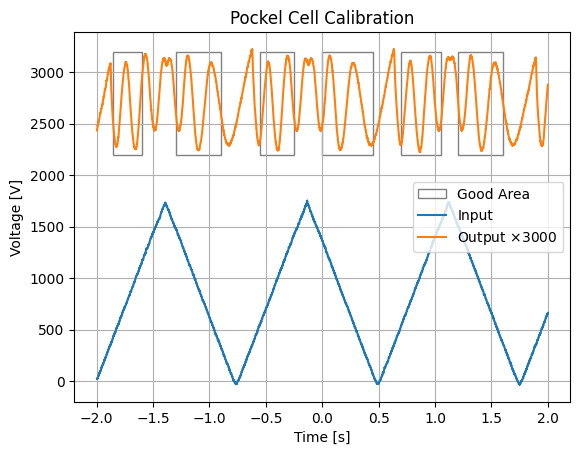

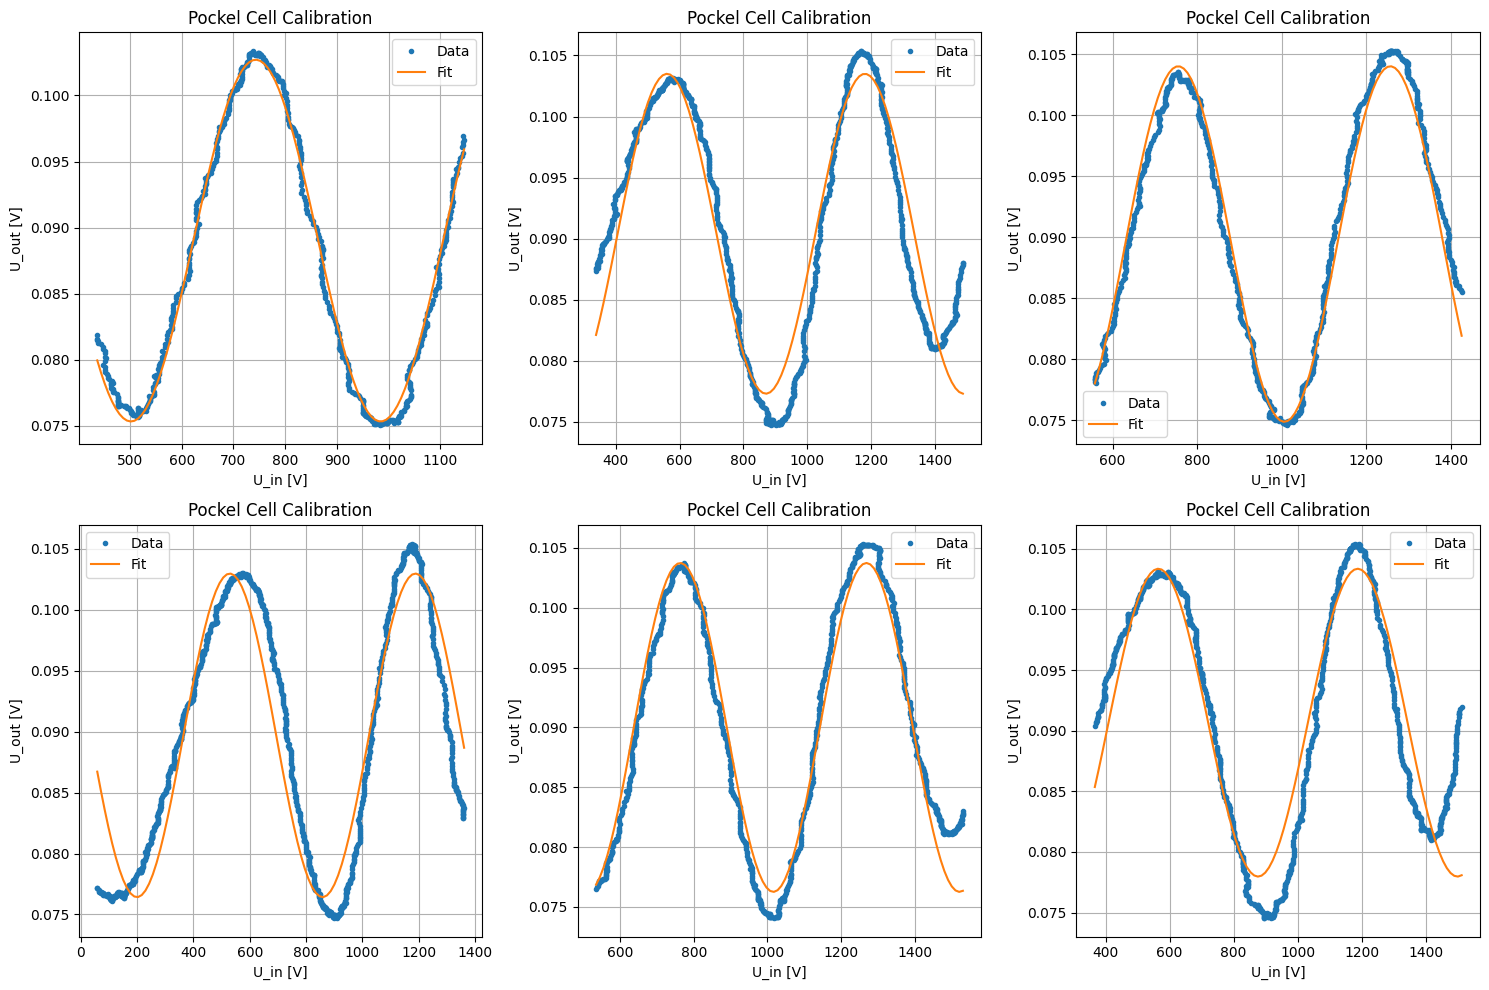

U_pi = 248 +/- 5 V


In [4]:
import matplotlib.patches as patches
# ch1 is input, ch4 is output of photodiode
# Measurement data with pockel cell attached

data = pd.read_csv('-90.csv')

#smooth the data
data['CH1'] = data['CH1'].rolling(window=10).mean()*m.n
data['CH4'] = data['CH4'].rolling(window=10).mean()

# plot the data

fig, ax = plt.subplots()

# Rechteck definieren (linke untere Ecke (x, y), Breite, Höhe)
rect = patches.Rectangle((-1.85, 2200), 0.25, 1000, linewidth=1, edgecolor='grey', facecolor='none', label='Good Area')
ax.add_patch(rect)
rect = patches.Rectangle((-1.3, 2200), 0.4, 1000, linewidth=1, edgecolor='grey', facecolor='none')
ax.add_patch(rect)
rect = patches.Rectangle((-0.55, 2200), 0.3, 1000, linewidth=1, edgecolor='grey', facecolor='none')
ax.add_patch(rect)
rect = patches.Rectangle((0, 2200), 0.45, 1000, linewidth=1, edgecolor='grey', facecolor='none')
ax.add_patch(rect)
rect = patches.Rectangle((0.7, 2200), 0.35, 1000, linewidth=1, edgecolor='grey', facecolor='none')
ax.add_patch(rect)
rect = patches.Rectangle((1.2, 2200), 0.4, 1000, linewidth=1, edgecolor='grey', facecolor='none')
ax.add_patch(rect)


ax.plot(data['TIME'], data['CH1'], label='Input')
ax.plot(data['TIME'], data['CH4']*3e4, label=r'Output $\times$3000')
""" unused plot
ax.vlines(-1.3, -100, 3500, colors='grey', linestyles='dashed')
ax.vlines(-0.9, -100, 3500, colors='grey', linestyles='dashed')
ax.vlines(-0.55, -100, 3500, colors='grey', linestyles='dashed')
ax.vlines(-0.25, -100, 3500, colors='grey', linestyles='dashed')
ax.vlines(0, -100, 3500, colors='grey', linestyles='dashed')
ax.vlines(0.45, -100, 3500, colors='grey', linestyles='dashed')
ax.vlines(0.7, -100, 3500, colors='grey', linestyles='dashed')
ax.vlines(1.05, -100, 3500, colors='grey', linestyles='dashed')
ax.vlines(1.2, -100, 3500, colors='grey', linestyles='dashed')
ax.vlines(1.6, -100, 3500, colors='grey', linestyles='dashed')
"""
plt.xlabel('Time [s]')
plt.ylabel('Voltage [V]')
plt.title('Pockel Cell Calibration')
plt.grid()
plt.legend()
plt.show()

# get the data in the good area
good_data = data[(data['TIME'] > -1.85) & (data['TIME'] < -1.6)]
good_data2 = data[(data['TIME'] > -1.3) & (data['TIME'] < -0.9)]
good_data3 = data[(data['TIME'] > -0.55) & (data['TIME'] < -0.25)]
good_data4 = data[(data['TIME'] > 0) & (data['TIME'] < 0.45)]
good_data5 = data[(data['TIME'] > 0.7) & (data['TIME'] < 1.05)]
good_data6 = data[(data['TIME'] > 1.2) & (data['TIME'] < 1.6)]

""" unused plot
# plot the data in the good area
fig, ax = plt.subplots()
ax.plot(good_data['TIME'], good_data['CH1'], label='Input')
ax.plot(good_data['TIME'], good_data['CH4']*1.5e4, label=r'Output $\times$1500')
plt.xlabel('Time [s]')
plt.ylabel('Voltage [V]')
plt.title('Pockel Cell Calibration')
plt.grid()
plt.legend()
plt.show()
"""


# Fit the data

def fit_func(x, a, b, c, d):
    return a + b*np.cos(d - c*x)**2

popt, pcov = opt.curve_fit(fit_func, good_data['CH1'], good_data['CH4'], p0=[0.05, 0.1, 1/200 , 0], maxfev=10000)
popt2, pcov2 = opt.curve_fit(fit_func, good_data2['CH1'], good_data2['CH4'], p0=[0.05, 0.1, 1/200 , 0], maxfev=10000)
popt3, pcov3 = opt.curve_fit(fit_func, good_data3['CH1'], good_data3['CH4'], p0=[0.05, 0.1, 1/200 , 0], maxfev=10000)
popt4, pcov4 = opt.curve_fit(fit_func, good_data4['CH1'], good_data4['CH4'], p0=[0.05, 0.1, 1/200 , 0], maxfev=10000)
popt5, pcov5 = opt.curve_fit(fit_func, good_data5['CH1'], good_data5['CH4'], p0=[0.05, 0.1, 1/200 , 0], maxfev=10000)
popt6, pcov6 = opt.curve_fit(fit_func, good_data6['CH1'], good_data6['CH4'], p0=[0.05, 0.1, 1/200 , 0], maxfev=10000)

c = unc.ufloat(popt[2], np.sqrt(pcov[2,2]))
U_pi = np.pi/2/c
c2 = unc.ufloat(popt2[2], np.sqrt(pcov2[2,2]))
U_pi2 = np.pi/2/c2
c3 = unc.ufloat(popt3[2], np.sqrt(pcov3[2,2]))
U_pi3 = np.pi/2/c3
c4 = unc.ufloat(popt4[2], np.sqrt(pcov4[2,2]))
U_pi4 = np.pi/2/c4
c5 = unc.ufloat(popt5[2], np.sqrt(pcov5[2,2]))
U_pi5 = np.pi/2/c5
c6 = unc.ufloat(popt6[2], np.sqrt(pcov6[2,2]))
U_pi6 = np.pi/2/c6

# Plot the data
# 2x3 subplots
fig, axs = plt.subplots(2, 3, figsize=(15, 10))
x = np.linspace(good_data['CH1'].min(), good_data['CH1'].max(), 100)
axs[0, 0].plot(good_data['CH1'], good_data['CH4'], 'o', label='Data', markersize=3)
axs[0, 0].plot(x, fit_func(x, *popt), label='Fit')
axs[0, 0].set_xlabel('U_in [V]')
axs[0, 0].set_ylabel('U_out [V]')
axs[0, 0].set_title('Pockel Cell Calibration')
axs[0, 0].grid()
axs[0, 0].legend()

x = np.linspace(good_data2['CH1'].min(), good_data2['CH1'].max(), 100)
axs[0, 1].plot(good_data2['CH1'], good_data2['CH4'], 'o', label='Data', markersize=3)
axs[0, 1].plot(x, fit_func(x, *popt2), label='Fit')
axs[0, 1].set_xlabel('U_in [V]')
axs[0, 1].set_ylabel('U_out [V]')
axs[0, 1].set_title('Pockel Cell Calibration')
axs[0, 1].grid()
axs[0, 1].legend()

x = np.linspace(good_data3['CH1'].min(), good_data3['CH1'].max(), 100)
axs[0, 2].plot(good_data3['CH1'], good_data3['CH4'], 'o', label='Data', markersize=3)
axs[0, 2].plot(x, fit_func(x, *popt3), label='Fit')
axs[0, 2].set_xlabel('U_in [V]')
axs[0, 2].set_ylabel('U_out [V]')
axs[0, 2].set_title('Pockel Cell Calibration')
axs[0, 2].grid()
axs[0, 2].legend()

x = np.linspace(good_data4['CH1'].min(), good_data4['CH1'].max(), 100)
axs[1, 0].plot(good_data4['CH1'], good_data4['CH4'], 'o', label='Data', markersize=3)
axs[1, 0].plot(x, fit_func(x, *popt4), label='Fit')
axs[1, 0].set_xlabel('U_in [V]')
axs[1, 0].set_ylabel('U_out [V]')
axs[1, 0].set_title('Pockel Cell Calibration')
axs[1, 0].grid()
axs[1, 0].legend()

x = np.linspace(good_data5['CH1'].min(), good_data5['CH1'].max(), 100)
axs[1, 1].plot(good_data5['CH1'], good_data5['CH4'], 'o', label='Data', markersize=3)
axs[1, 1].plot(x, fit_func(x, *popt5), label='Fit')
axs[1, 1].set_xlabel('U_in [V]')
axs[1, 1].set_ylabel('U_out [V]')
axs[1, 1].set_title('Pockel Cell Calibration')
axs[1, 1].grid()
axs[1, 1].legend()

x = np.linspace(good_data6['CH1'].min(), good_data6['CH1'].max(), 100)
axs[1, 2].plot(good_data6['CH1'], good_data6['CH4'], 'o', label='Data', markersize=3)
axs[1, 2].plot(x, fit_func(x, *popt6), label='Fit')
axs[1, 2].set_xlabel('U_in [V]')
axs[1, 2].set_ylabel('U_out [V]')
axs[1, 2].set_title('Pockel Cell Calibration')
axs[1, 2].grid()
axs[1, 2].legend()

plt.tight_layout()
plt.show()

# calculate the mean and standard deviation of the half-wave voltage
U_pi0 = np.mean([U_pi.n, U_pi3.n, U_pi5.n]) # better fits for rising edge
dU_pi0 = np.std([U_pi.n, U_pi3.n, U_pi5.n])
print("U_pi = {:.0f} +/- {:.0f} V".format(U_pi0, dU_pi0))

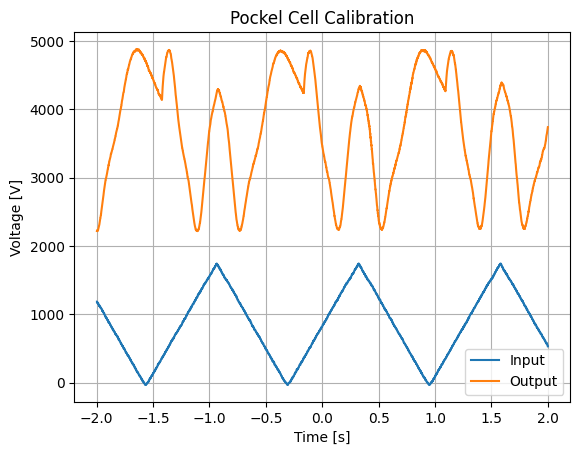

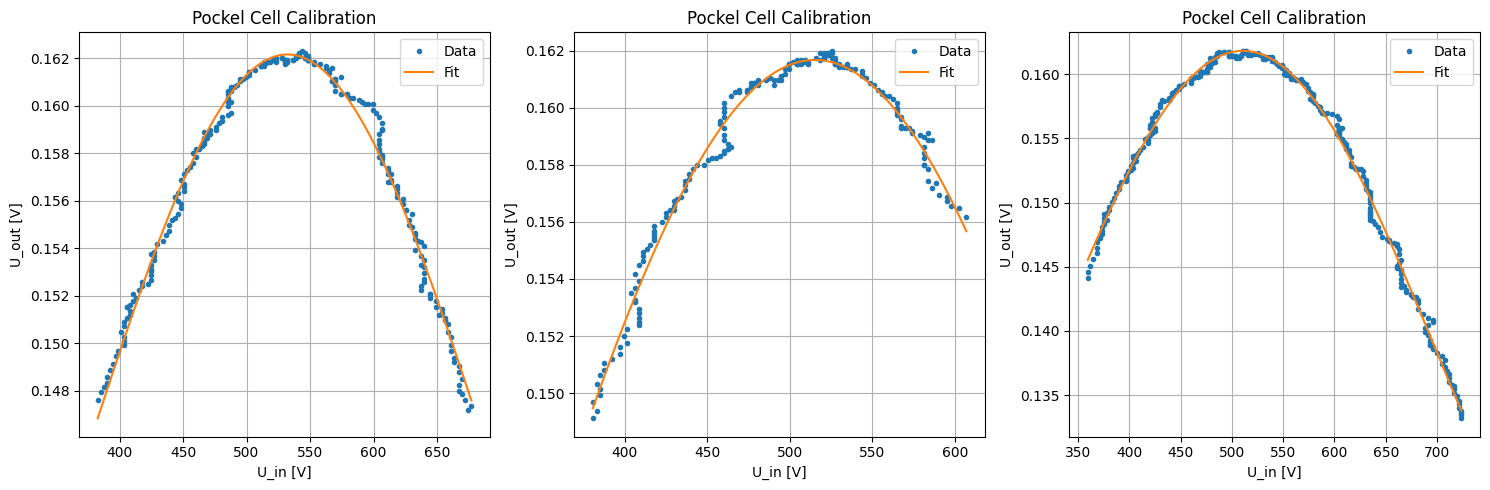

303.1038705511693 384.0663380056465 369+/-8
0.00518+/-0.00031 0.0041+/-0.0007 0.00426+/-0.00009
U_pi = 352 +/- 35 V


In [5]:
data = pd.read_csv('0.csv')

# %matplotlib qt


#smooth the data
data['CH1'] = data['CH1'].rolling(window=10).mean()*m.n
data['CH4'] = data['CH4'].rolling(window=10).mean()

plt.figure()
plt.plot(data['TIME'], data['CH1'], label='Input')
plt.plot(data['TIME'], data['CH4']*3e4, label='Output')
plt.xlabel('Time [s]')
plt.ylabel('Voltage [V]')
plt.title('Pockel Cell Calibration')
plt.grid()
plt.legend()
plt.show()

# -1.41 to -1.278
# -0.155 to -0.03
# 1.095 to 1.22

good_data1 = data[(data['TIME'] > -1.41) & (data['TIME'] < -1.31)]
good_data2 = data[(data['TIME'] > -0.155) & (data['TIME'] < -0.08)]
good_data3 = data[(data['TIME'] > 1.095) & (data['TIME'] < 1.22)]

# Fit the data

popt1, pcov1 = opt.curve_fit(fit_func, good_data1['CH1'], good_data1['CH4'], p0=[0.05, 0.1, 1/100 , 0], maxfev=10000)
popt2, pcov2 = opt.curve_fit(fit_func, good_data2['CH1'], good_data2['CH4'], p0=[0.05, 0.1, 1/100 , 0], maxfev=10000)
popt3, pcov3 = opt.curve_fit(fit_func, good_data3['CH1'], good_data3['CH4'], p0=[0.05, 0.1, 1/100 , 0], maxfev=10000)

c1 = unc.ufloat(popt1[2], np.sqrt(pcov1[2,2]))
U_pi1 = np.pi/2/c1
c2 = unc.ufloat(popt2[2], np.sqrt(pcov2[2,2]))
U_pi2 = np.pi/2/c2
c3 = unc.ufloat(popt3[2], np.sqrt(pcov3[2,2]))
U_pi3 = np.pi/2/c3

# Plot the data
# 1x3 subplots
fig, axs = plt.subplots(1, 3, figsize=(15, 5))
x = np.linspace(good_data1['CH1'].min(), good_data1['CH1'].max(), 100)
axs[0].plot(good_data1['CH1'], good_data1['CH4'], 'o', label='Data', markersize=3)
axs[0].plot(x, fit_func(x, *popt1), label='Fit')
axs[0].set_xlabel('U_in [V]')
axs[0].set_ylabel('U_out [V]')
axs[0].set_title('Pockel Cell Calibration')
axs[0].grid()
axs[0].legend()

x = np.linspace(good_data2['CH1'].min(), good_data2['CH1'].max(), 100)
axs[1].plot(good_data2['CH1'], good_data2['CH4'], 'o', label='Data', markersize=3)
axs[1].plot(x, fit_func(x, *popt2), label='Fit')
axs[1].set_xlabel('U_in [V]')
axs[1].set_ylabel('U_out [V]')
axs[1].set_title('Pockel Cell Calibration')
axs[1].grid()
axs[1].legend()

x = np.linspace(good_data3['CH1'].min(), good_data3['CH1'].max(), 100)
axs[2].plot(good_data3['CH1'], good_data3['CH4'], 'o', label='Data', markersize=3)
axs[2].plot(x, fit_func(x, *popt3), label='Fit')
axs[2].set_xlabel('U_in [V]')
axs[2].set_ylabel('U_out [V]')
axs[2].set_title('Pockel Cell Calibration')
axs[2].grid()
axs[2].legend()

plt.tight_layout()
plt.show()

# calculate the mean and standard deviation of the half-wave voltage
U_pi0 = np.mean([U_pi1.n, U_pi2.n, U_pi3.n])
dU_pi0 = np.std([U_pi1.n, U_pi2.n, U_pi3.n])
print(U_pi1.n, U_pi2.n, U_pi3)
print(c1, c2, c3)
print("U_pi = {:.0f} +/- {:.0f} V".format(U_pi0, dU_pi0))

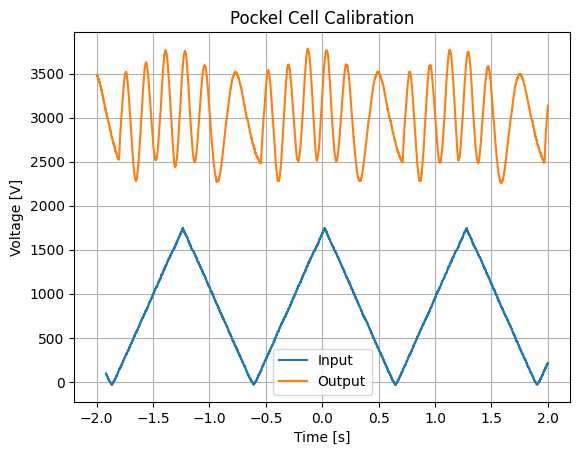

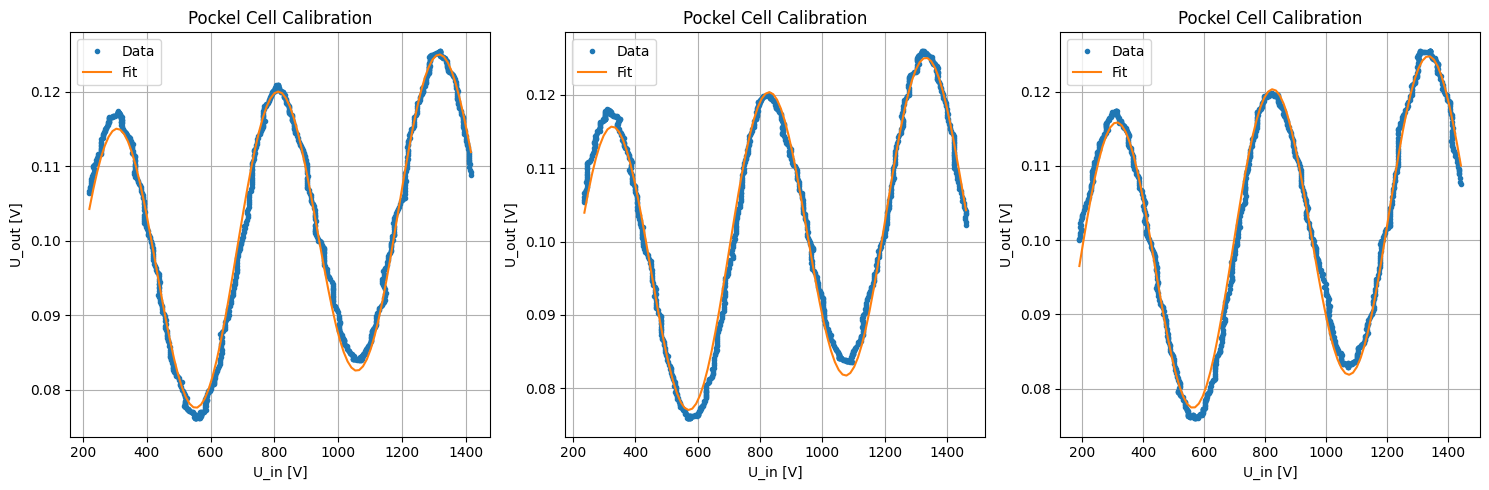

252.78368028715886 251.71488650908012 255.64+/-0.20
0.006214+/-0.000005 0.006240+/-0.000005 0.006145+/-0.000005
U_pi = 253 +/- 2 V


In [6]:
#%matplotlib qt
data = pd.read_csv('90.csv')

#smooth the data
data['CH1'] = data['CH1'].rolling(window=10).mean().shift(200)*m.n #Shift to fix the delay
data['CH4'] = data['CH4'].rolling(window=10).mean()

plt.figure()
plt.plot(data['TIME'], data['CH1'], label='Input')
plt.plot(data['TIME'], data['CH4']*3e4, label='Output')
plt.xlabel('Time [s]')
plt.ylabel('Voltage [V]')
plt.title('Pockel Cell Calibration')
plt.grid()
plt.legend()
plt.show()

# learned from -90 that the good areas are olny the rising edges
# -1.77 to -1.35
# -0.51 to -0.08
# 0.735 to 1.17

good_data1 = data[(data['TIME'] > -1.77) & (data['TIME'] < -1.35)]
good_data2 = data[(data['TIME'] > -0.51) & (data['TIME'] < -0.08)]
good_data3 = data[(data['TIME'] > 0.735) & (data['TIME'] < 1.17)]

# Fit the data

def fit_func1(x, a, b, c, d, m):
    return fit_func(x, a, b, c, d) + m*x

popt1, pcov1 = opt.curve_fit(fit_func1, good_data1['CH1'], good_data1['CH4'], p0=[0.05, 0.1, 1/200 , 0, 0], maxfev=10000)
popt2, pcov2 = opt.curve_fit(fit_func1, good_data2['CH1'], good_data2['CH4'], p0=[0.05, 0.1, 1/200 , 0, 0], maxfev=10000)
popt3, pcov3 = opt.curve_fit(fit_func1, good_data3['CH1'], good_data3['CH4'], p0=[0.05, 0.1, 1/200 , 0, 0], maxfev=10000)

c1 = unc.ufloat(popt1[2], np.sqrt(pcov1[2,2]))
U_pi1 = np.pi/2/c1
c2 = unc.ufloat(popt2[2], np.sqrt(pcov2[2,2]))
U_pi2 = np.pi/2/c2
c3 = unc.ufloat(popt3[2], np.sqrt(pcov3[2,2]))
U_pi3 = np.pi/2/c3

# Plot the data
# 1x3 subplots
fig, axs = plt.subplots(1, 3, figsize=(15, 5))

x = np.linspace(good_data1['CH1'].min(), good_data1['CH1'].max(), 100)
axs[0].plot(good_data1['CH1'], good_data1['CH4'], 'o', label='Data', markersize=3)
axs[0].plot(x, fit_func1(x, *popt1), label='Fit')
axs[0].set_xlabel('U_in [V]')
axs[0].set_ylabel('U_out [V]')
axs[0].set_title('Pockel Cell Calibration')
axs[0].grid()
axs[0].legend()

x = np.linspace(good_data2['CH1'].min(), good_data2['CH1'].max(), 100)
axs[1].plot(good_data2['CH1'], good_data2['CH4'], 'o', label='Data', markersize=3)
axs[1].plot(x, fit_func1(x, *popt2), label='Fit')
axs[1].set_xlabel('U_in [V]')
axs[1].set_ylabel('U_out [V]')
axs[1].set_title('Pockel Cell Calibration')
axs[1].grid()
axs[1].legend()

x = np.linspace(good_data3['CH1'].min(), good_data3['CH1'].max(), 100)
axs[2].plot(good_data3['CH1'], good_data3['CH4'], 'o', label='Data', markersize=3)
axs[2].plot(x, fit_func1(x, *popt3), label='Fit')
axs[2].set_xlabel('U_in [V]')
axs[2].set_ylabel('U_out [V]')
axs[2].set_title('Pockel Cell Calibration')
axs[2].grid()
axs[2].legend()

plt.tight_layout()
plt.show()

# calculate the mean and standard deviation of the half-wave voltage
U_pi0 = np.mean([U_pi1.n, U_pi2.n, U_pi3.n])
dU_pi0 = np.std([U_pi1.n, U_pi2.n, U_pi3.n])
print(U_pi1.n, U_pi2.n, U_pi3)
print(c1, c2, c3)
print("U_pi = {:.0f} +/- {:.0f} V".format(U_pi0, dU_pi0))

Determine the Pockels coefficient

In [ ]:
U_pi_90 = unc.ufloat(248, 5)
U_pi0 = unc.ufloat(352, 35)
U_pi90 = unc.ufloat(253, 2)

# Z-Test
z = (U_pi_90.n - U_pi90.n)/np.sqrt(U_pi_90.s**2 + U_pi90.s**2)
print("Z-Test for 90deg: ", abs(z))
# Print the results
print("U_pi -90 = {:.0f} V".format(U_pi_90))
print("U_pi   0 = {:.0f} V".format(U_pi0))
print("U_pi  90 = {:.0f} V".format(U_pi90))

# Calculate the pockels coefficient


Z-Test for 90deg:  0.9284766908852594
U_pi -90 = 248+/-5 V
U_pi   0 = 352+/-35 V
U_pi  90 = 253+/-2 V


### 2.3 Polarization Manipulation - Intensity Modulation

V_pp changed to 5V $\\$
measured to csv

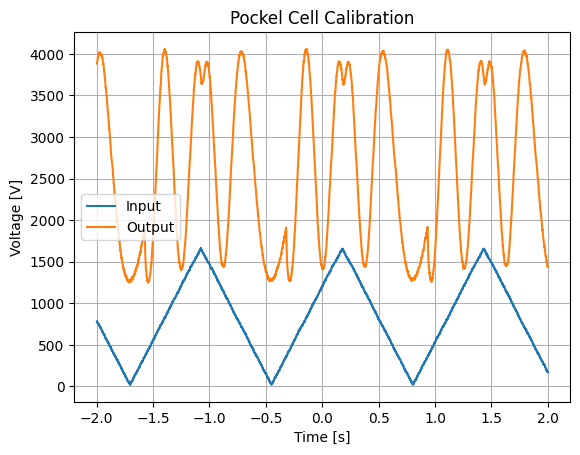

In [12]:
# -45 deg
data = pd.read_csv('-45.csv')

#smooth the data
data['CH1'] = data['CH1'].rolling(window=10).mean()*m.n
data['CH4'] = data['CH4'].rolling(window=10).mean()

plt.figure()
plt.plot(data['TIME'], data['CH1'], label='Input')
plt.plot(data['TIME'], data['CH4']*1e3, label='Output')
plt.xlabel('Time [s]')
plt.ylabel('Voltage [V]')
plt.title('Pockel Cell Calibration')
plt.grid()
plt.legend()
plt.show()

### 2.4 Linear Amplitude Modulation
V for linear $3.44\pm0.10$ $\\$
change offset voltage to 4.24 for example off the linear one

## 3. Acousto-Optic Effect

### 3.1 Two perpendicular AOMs
- What diffraction pattern of the laser do you expect? What do you get? $\\$ periodic 2D grating
- What happens to the diffraction pattern when you change one or both of the offset voltages? Why is that? $\\$
for higher voltages we get a smaller lattice distance. It changes the freq of the AOM and there fore the distance between maxima
- What happens to the diffraction pattern when you modulate the sound frequency of both AOMs with a Sine-wave at a modulation frequency of 1 Hz with high offset? Do not forget to align both signals! $\\$
the lattice constant changes with the time, so wie get a moving pattern
- What happens to the diffraction pattern when you modulate the sound frequency at a higher modulation frequency? And for different input wave forms (Sine, Square, Ramp)? $\\$
We get different forms in the interference pictures for the fast moving maxima
- Observe and explain the diffraction patterns at a relative phase difference between both output channels of 0◦, 90◦, and 180◦ $\\$
we get different forms, circles turn into ellipses
- Compare the diffraction spots of the zeroth and first rows and columns respectively for each relative phase difference. How are the patterns connected to each other? Can you use the previous steps to draw a circle with the (±1,±1) or (±1,±2) order? And with the (±2,±2) order? $\\$ 
The second maxima gets a bigger therafore the image in (1,2) maxima gets distorted
- Try to modulate the sound frequency of one AOM exactly twice, three times,..., as fast as the other one. What happens when the modulation is not exactly n times the other? How can you tell when the phase difference is stable? $\\$
As soon as we get a stable image its a multiple phase difference!

### 3.2 Experiments with a single AOM

- Measuring the diffraction angles $\\$
d = $1,51\pm0.01$ m $\\$
Δx1 = $2,4\pm0.2$ cm $\\$
Δx2 = $4.8\pm0.2$ cm $\\$
- Used two polerizer to dimm the intensitiy ($\vartheta = 156,5$)

In [ ]:
f = 104e6 
df = 1e6

U0 = 7.2 #V
dU0 = 0.2 #V
U1 = 1.18 #V
dU1 = 0.05 #V
U2 = 23 #mV
dU2 = 1 #mV
Unon = 4.4 #mV 
dUnon = 0.4 #mV

# changed polarize
U1 = 6.0 #V
dU1 = 0.1 #V
U2 = 44 #mV
dU2 = 1 #mV
Unon = 4.4 #mV
dUnon = 0.4 #mV

# turns out to be the wrong experiment xd

In [ ]:
# power rel. to frequency

f = [132.4, 126.5, 120.8, 115.3, 109.8, 97,4, 90.8, 84.8] #MHz
U0 = [3.7, 4.16, 5.8, 6.4, 6.32, 5.82, 4.08, 3.60, 4.48] #V
U1 = [22, 112, 440, 580, 580, 540, 344, 126, 70] #mV

Unon = 3.2 #mV

In [ ]:
# power rel. to amplitude

A = [0.7, 0.8, 0.9, 1.0, 1.1, 1.2, 1.3, 1.4, 1.5, 1.6, 1.7, 1.8, 1.9, 2.0] #V
# U0 = [7.0, 6.8, 6.6, 6.4, 6.2, 5.7, 5.4, 5.0, 4.8,  , 4.4, 4.0, 3.6] #V wron data
U0 = [6.16, 5.92, 5.68, 5.28, 4.80, 4.40, 4.08, 3.680, 3.44, 3.12, 2.96, 2.72, 2.56, 2.40] #V
U1 = [64, 150, 250, 280, 320, 268, 270, 280, 260, 260, 250, 240, 220, 212] #mV
